In [1]:
!pip install selenium
!pip install bs4

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import selenium
from bs4 import BeautifulSoup
import requests

In [25]:
#The baseballsavant website would not allow for multiple seasons to be downloaded at one with a max of two
#All of this data is pre-filtered into home run events in order to make the dataset managable and not too large
df = pd.read_csv('Datasets/Home_Run_Data.csv')
mergeDF = pd.read_csv('Datasets/MergedHR.csv')

#Built-in function which allows for the data in each csv to be appended onto one another, increasing the amount of data
ans = pd.concat([df,mergeDF], ignore_index = True)
ans.dropna(axis = 1, how = 'all', inplace = True)
ans.head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2022-10-05,89.2,2.43,5.40,"Vázquez, Christian",543877,674681,home_run,hit_into_play,...,0,0,3,3,0,Standard,Standard,135.0,0.061,1.029
1,SL,2022-10-05,91.1,-1.81,6.24,"Moreno, Gabriel",672515,657508,home_run,hit_into_play,...,0,4,0,4,0,Standard,Standard,191.0,-0.214,2.286
2,SI,2022-10-05,90.7,2.03,5.69,"Torrens, Luis",620443,641302,home_run,hit_into_play,...,3,3,4,4,3,Standard,Standard,151.0,0.333,1.835
3,FF,2022-10-05,93.6,-1.58,6.33,"Choi, Ji-Man",596847,601713,home_run,hit_into_play,...,3,2,3,2,3,Infield shift,Standard,203.0,-0.159,1.659
4,CU,2022-10-05,78.5,-1.77,5.39,"McCann, James",543510,607200,home_run,hit_into_play,...,0,0,9,9,0,Standard,Standard,58.0,0.020,1.995
5,FF,2022-10-05,91.2,-1.28,6.43,"Vavra, Terrin",679631,669952,home_run,hit_into_play,...,4,4,5,5,4,Standard,Standard,196.0,0.696,2.652
6,CH,2022-10-05,81.1,2.99,5.26,"Martinez, J.D.",502110,676596,home_run,hit_into_play,...,2,2,4,4,2,Standard,Standard,105.0,0.103,1.026
7,FC,2022-10-05,86.8,-1.94,5.73,"Villar, David",681584,489334,home_run,hit_into_play,...,1,3,1,3,1,Standard,Standard,194.0,-0.194,1.588
8,FC,2022-10-05,85.3,-0.78,6.43,"Isbel, Kyle",664728,650644,home_run,hit_into_play,...,6,2,6,2,6,Standard,Standard,136.0,-0.038,0.967
9,CU,2022-10-05,81.9,-1.44,5.73,"Heim, Jonah",641680,593334,home_run,hit_into_play,...,2,2,2,2,2,Infield shift,Standard,57.0,0.144,1.039


In [4]:
ans.keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 

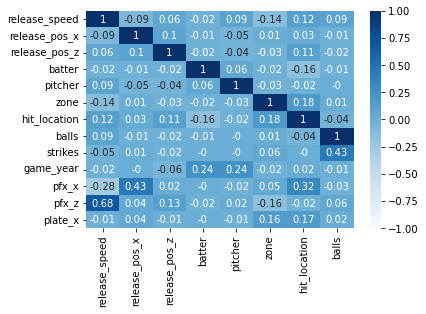

<Figure size 1800x720 with 0 Axes>

In [5]:
#Before we start, we want to see if there is a correlation between any variables
#Initially, there were too many variables to make the corr matrix readable, so we have to minimize 
corrMatrix = round(ans.corr(), 2)
corrMatrix = corrMatrix.loc['release_speed':'plate_x']
corrMatrix = corrMatrix[corrMatrix.columns[0:8]]

#This correlation matrix will show the dependency of variables within different categories
#The close the value to one, the more related the variables are to one another
sns.heatmap(corrMatrix, annot = True, vmin = -1, vmax = 1, cmap ='Blues')
plt.figure(figsize = (25,10))
plt.show()

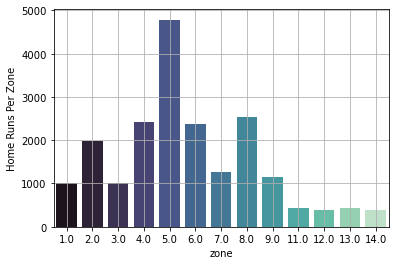

In [6]:
#Create a distribution plot of the amount of homeruns in a specific zone
sns.countplot(data = ans, x = 'zone', palette = 'mako')
plt.ylabel('Home Runs Per Zone')
plt.grid()
#As we can see below, the greatest number of homeruns occur in zone 5 which is in the middle of the strike zone

<AxesSubplot:xlabel='zone', ylabel='count'>

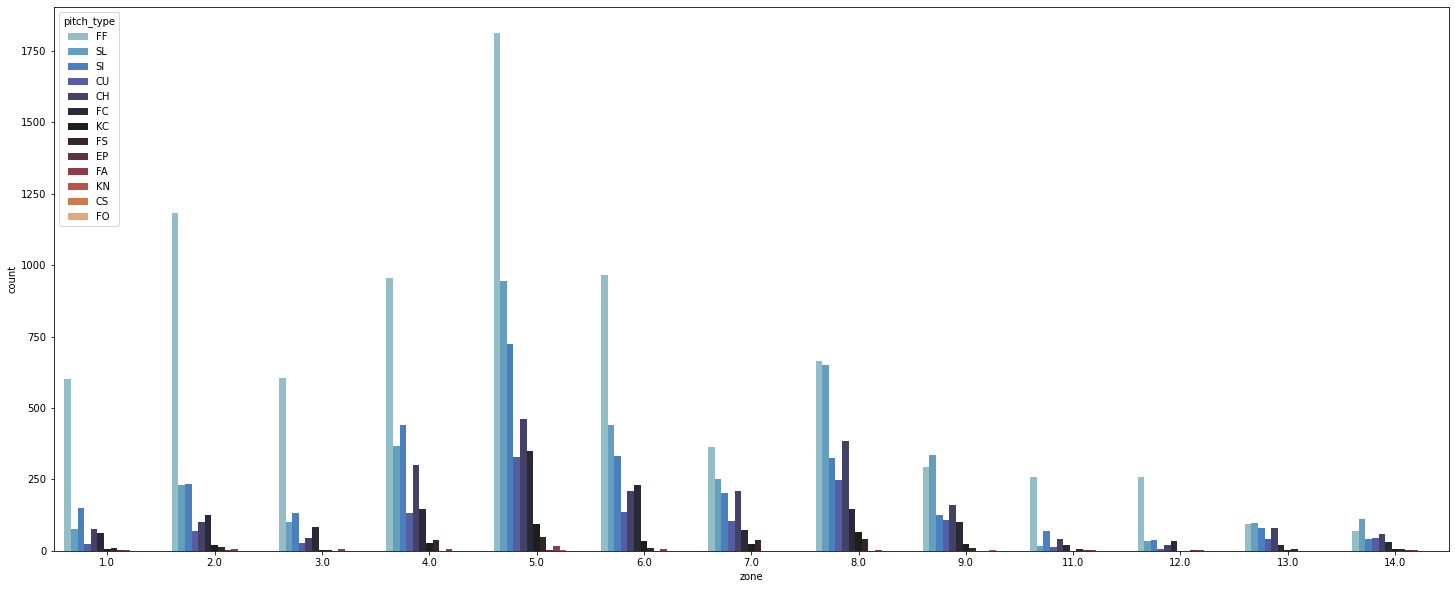

In [7]:
#Figure was too small and data was bunched up initially, so I increased the length and width of the plot
plt.figure(figsize = (25,10))
sns.countplot(data = ans, x = 'zone', palette = 'icefire', hue = 'pitch_type')
#With this graph we are able to determine the number of homeruns in each zone, corresponding to the specific type of pitch

In [8]:
def comparePlayers(df, playerName1, playerName2):
    
    #Creates two plots, sharing the same margin to give the user a comparison of baseball players
    fig, axes = plt.subplots(1, 2, figsize = (10,5), sharey = True)
    plt.subplots_adjust(hspace = None)

    #Removes the left spine of the plot as a lot of the data was on top of eachother
    sns.despine(left = True)
    
    #Distribution plot to break down the amount of homeruns in a specific zone
    sns.countplot(data = df[df['player_name'] == playerName1], x = 'zone', palette = 'icefire', ax = axes[0])
    axes[0].set_ylabel('Home Runs Per Zone')
    axes[0].set_title(f"Distribution of Home Runs for {playerName1}")
    
    #Distribution plot of the second player to show the amount of homeruns in a zone
    sns.countplot(data = df[df['player_name'] == playerName2], x = 'zone', palette = 'icefire', ax = axes[1])
    axes[1].set_ylabel("")
    axes[1].set_title(f"Distribution of Home Runs for {playerName2}")
    
    axes[0].grid()
    axes[1].grid()

    plt.show()
    

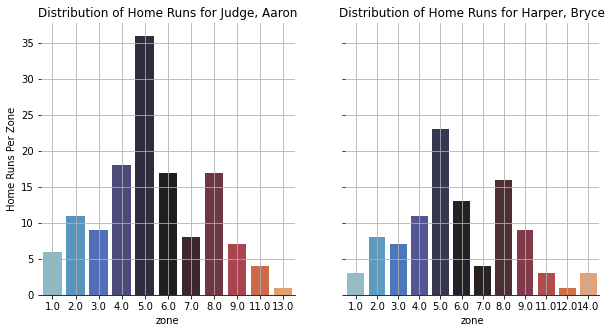

In [9]:
#Compare the number of hum runs for two players, sharing the y-axis to properly compare these two graphs
comparePlayers(ans,'Judge, Aaron','Harper, Bryce')

In [10]:
def homeRunsbyZone(df, playerName):
    '''
    Creates a dataframe, searching for the specific player name in the original data frame. For each zone and player
    in the dataframe, it will count the number of home runs. It will then filter by a specific player to return the final dataset
    Inputs: 
    df (pandas DataFrame): will subset the data to return a grouped dataframe given certain factors
    playerName (string): searches for a specific player within the dataframe
    '''
    
    #Calculates the number of homeruns per zone per player
    df2 = pd.DataFrame(ans.groupby(['zone','player_name'])['events'].agg('count'))
    #Renames the resulting column instead of having a generic 'count'
    df2.rename({'events':'Home Runs Per Zone'}, axis = 1, inplace = True)
    #Makes accessing individual elements easier
    df2.reset_index(inplace=True)
    #Filters by name to only get the data relevant to the player searched
    df2 = df2[(df2['player_name'] == playerName)]
    return df2

test = homeRunsbyZone(ans, 'Harper, Bryce')
test

,zone,player_name,Home Runs Per Zone
167,1.0,"Harper, Bryce",3
641,2.0,"Harper, Bryce",8
1132,3.0,"Harper, Bryce",7
1606,4.0,"Harper, Bryce",11
2223,5.0,"Harper, Bryce",23
2867,6.0,"Harper, Bryce",13
3375,7.0,"Harper, Bryce",4
3841,8.0,"Harper, Bryce",16
4343,9.0,"Harper, Bryce",9
4699,11.0,"Harper, Bryce",3


In [125]:
def plotHeatMap(df, playerName):
    
    #Checks the user input, seeing if any of the column names remotely match the playerName types in
    if df['player_name'].str.contains(playerName).any():
        #Only wants to gather the information for the strike zones(1-9)
        df = df[(df['player_name'].str.contains(playerName)) & (df['zone'].between(0,9))].reset_index().copy()
        playerName = df['player_name'].iloc[0]
    #An invalid player name is entered, which will essentially catch the error and return a print statement
    else:
        print("Please enter a valid player")
        return

    #Assign a cartesian coordinate system in order to gather the proper information with strike zones
    #This concept of cartesian coordinates was gathered from DataCamp
    def x_coord(col):
        if col['zone'] in [1,4,7]:
            return 1
        elif col['zone'] in [2,5,8]:
            return 2
        elif col['zone'] in [3,6,9]:
            return 3

    def y_coord(row):
        if row['zone'] in [1,2,3]:
            return 3
        elif row['zone'] in [4,5,6]:
            return 2
        elif row['zone'] in [7,8,9]:
            return 1
    
    
    #Assigns new columns with x and y coordinates in order to graph the heatmap of homeruns
    df['xcoord'] = df.apply(x_coord, axis = 1)
    df['ycoord'] = df.apply(y_coord, axis = 1)

    #Using seaborn, creates a histogram plot (heatmap) with a bar for the user to translate the color on the screen with a number
    ax = sns.histplot(data = df, x  = 'xcoord', y = 'ycoord', discrete = True, cmap ='Reds',cbar = True)
    #Removes the left and bottom spine of the graph
    sns.despine(left=True, bottom = True)
    #Removes the x and y ticks from the graphs
    ax.set(yticks=[], xticks = [])
    ax.set_xlabel('Zone')
    ax.set_ylabel("")
    ax.set_title(f"Home Run Distribution for {playerName}")
    
    #Count initializes in order to for the strike zone to be illustrated by the graph
    count = 0
    
    #Iterates through the cartesian plane (x and y axis to annotate the heatmap with the strikezones)
    
    for y in range(1, 4):
        for x in range(1,4):
            count += 1
            plt.text(x, y, count, horizontalalignment='center', size='medium', color='grey', weight='heavy')
    plt.show()

    

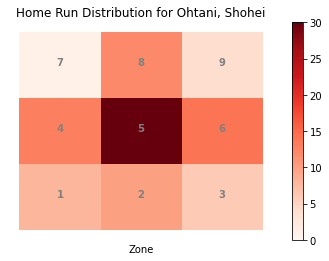

In [126]:
plotHeatMap(ans, 'Shohei')

In [13]:
#How does a player's launch speed and distance change throughout the seasons (2019-2022)
def launchOverTimeTop(df, top):
    #For each player, we want to gather the total number of homeruns
    top10Hitters = pd.DataFrame(df.groupby('player_name')['events'].agg('count'))
    #Renaming the column to make accessing the elements easier
    top10Hitters.rename({'events':'Home Runs'}, axis = 1, inplace = True)
    top10Hitters.reset_index(inplace=True)
    
    #Since we want to gather the top players, we want a descending order of values based on user input
    top10Hitters = top10Hitters.sort_values(by = 'Home Runs', ascending = False).head(top)
    
    #Creates a subplot with two rows each, with the number of columns depending on user input
    fig, axes = plt.subplots(2, top // 2, figsize = (20,5), sharey = True)

    #Getting an inner join in order to gather all of the information based on the top n players
    updated = pd.merge(ans, top10Hitters, how = 'inner')
    
    names = []
    
    #Gathers each name for the top n players
    for ind in updated.index:
        names.append(updated['player_name'][ind])
    
    #Makes sure that each name in the list is unique for indexing purposes
    names = list(set(names))
    
    
    for i, ax in zip(range(top), axes.ravel()):
        plt.tick_params(labelbottom = False,bottom = False)
        newdata = df[df['player_name'] == names[i]]
        sns.lineplot(data = newdata, x = 'game_date', y = 'launch_speed', hue = 'player_name', ax = ax)
        ax.xaxis.set_ticklabels([])

    plt.show()


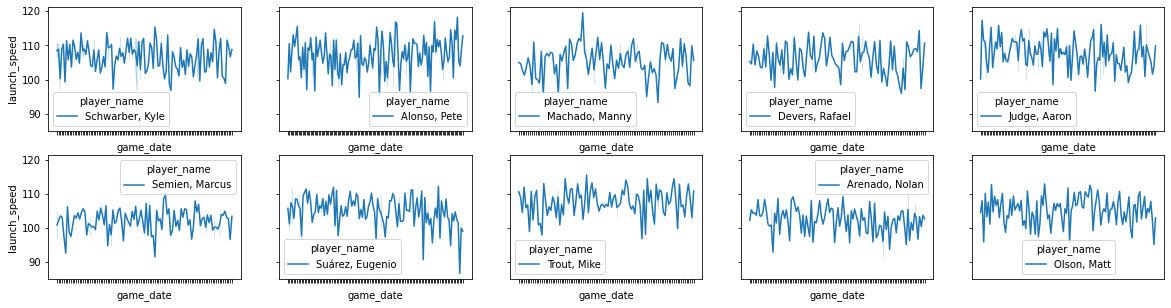

In [14]:
launchOverTimeTop(ans, 10)

# Working with PyBaseball

In [128]:
import pybaseball as pyb

Gathering Player Data


C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


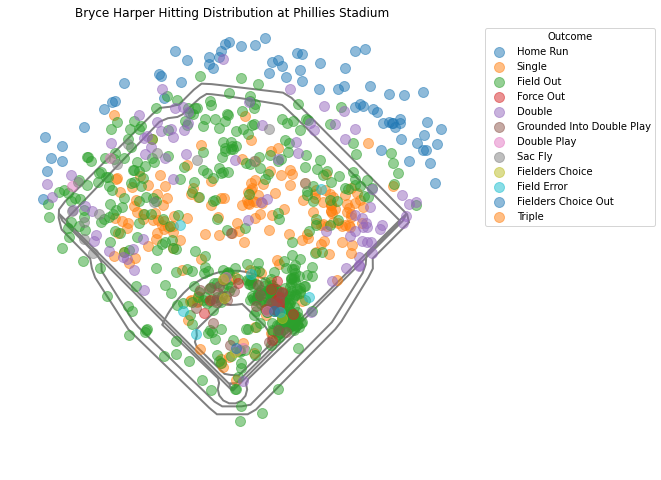

In [131]:
def scatterField(last, first, beginDate, endDate, stadium):
    pid = pyb.playerid_lookup(last,first)['key_mlbam'].values[0]
    data = pyb.statcast_batter(beginDate, endDate, pid)
    pyb.spraychart(data, title = f"{first.capitalize()} {last.capitalize()} Hitting Distribution at {stadium.capitalize()} Stadium", team_stadium = stadium)

scatterField('harper', 'bryce', '2017-05-01', '2019-07-01',  'phillies')

This is a large query, it may take a moment to complete


C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|██████████| 460/460 [00:16<00:00, 27.16it/s]
C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


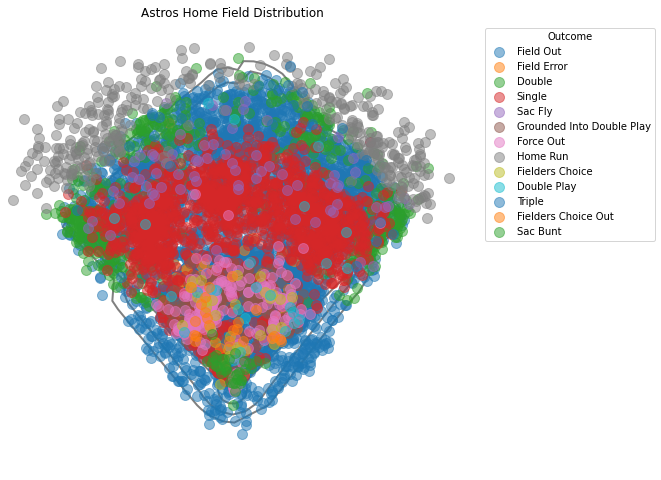

<Axes:title={'center':'Astros Home Field Distribution'}>

In [59]:
teamData = pyb.statcast("2021-04-01","2022-10-31", team = 'HOU')
pyb.spraychart(teamData, 'astros', title = 'Astros Home Field Distribution', colorby = 'events')
plt.show()

Gathering Player Data


C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\utils.py:224: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))
C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\utils.py:224: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))


<AxesSubplot:xlabel='launch_speed', ylabel='launch_angle'>

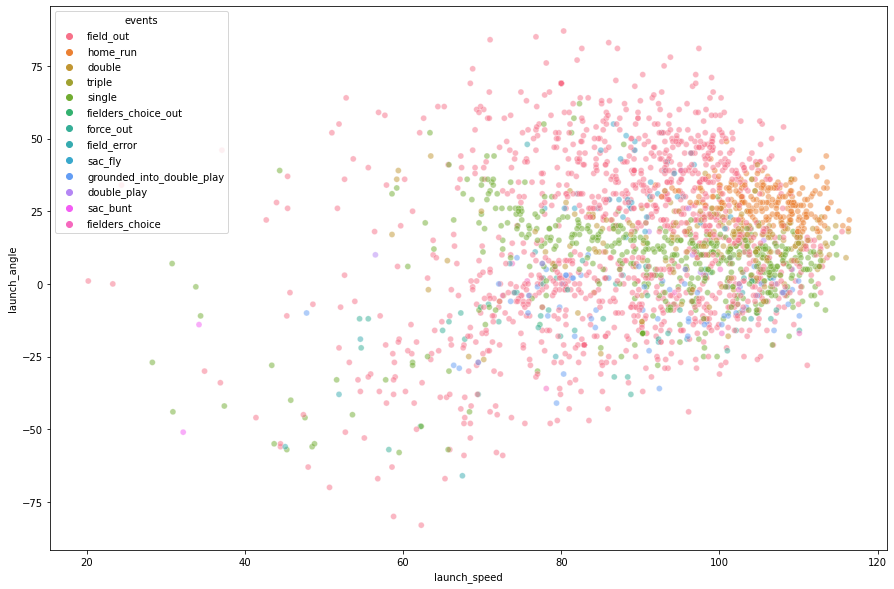

In [38]:
#Home Run Rate by Speed and Pitch Type
#Graph launch angle by exit velocity
pid = pyb.playerid_lookup('harper','bryce')['key_mlbam'].values[0]
bryceHarper = pyb.statcast_batter('2010-08-30', '2021-08-30', pid)
bryceHarper = bryceHarper[['launch_angle', 'launch_speed', 'pitch_name', 'events']]
bryceHarper.dropna(axis = 0, inplace = True)
plt.figure(figsize = (15,10))
sns.scatterplot(data = bryceHarper, x = 'launch_speed', y = 'launch_angle', hue = "events", alpha = .5)

In [37]:
bryceHarper.groupby('events')['events'].count()

events
double                        202
double_play                     8
field_error                    16
field_out                    1284
fielders_choice                 9
fielders_choice_out             4
force_out                      45
grounded_into_double_play      70
home_run                      206
sac_bunt                        2
sac_fly                        36
single                        468
triple                          7
Name: events, dtype: int64

# Webscraping

In [17]:
weblink = "https://www.spotrac.com/mlb/rankings/2020/salary/"
response = requests.get(weblink)
read_text = response.text

soup = BeautifulSoup(read_text)

#Gathers all of the hyperlinks from the websites  (href = True) and prints the titles of them through the .text
for x in soup.find_all('a', href = True):
    print(x.text.strip())




PREMIUM
Sign In
Register

NFL
Team Salary Caps
Positional Spending
Contracts
Salary Rankings
Free Agents

Trackers & Tools
» Market Values
» Fines/Suspensions
» IR Tracker
» Depth Charts Tracker
» Draft Tracker
» Options
» College Tracker
Best Values
Transactions

NBA
Team Cap Tracker
Positional Payrolls
Contracts
Salary Rankings
Free Agents

Trackers & Tools
» Depth Charts
» Options
» Fines/Suspensions
» Draft Tracker
» College Tracker
» Awards Tracker
Best Values

Transactions
» Recent Transactions
» Extensions
» Trades

MLB
Team Payrolls
Luxury Tax Tracker
Positional Payrolls
Contracts
Salary Rankings
Free Agents
Prospects

Trackers & Tools
» Fines/Suspensions
» Injured List Tracker
» Options Tracker
» Trade Tracker
» Arbitration Tracker
Best Values
Transactions

NHL
Team Salary Caps
Positional Payrolls
Contracts
Salary Rankings
Free Agents

Trackers & Tools
» IR Tracker
» Options
» Fines/Suspensions
» Draft Tracker
» Trade Tracker
» College/Junior Team Tracker
» Country Tracker


# Beautiful Soup Implementation

In [18]:
response = requests.post(weblink, data={'ajax': 'true','mobile': 'false'}).content
read_text = response

soup = BeautifulSoup(read_text)
column_headers = soup.find_all('tr')[0]
column_headers = [i.text.strip().title() for i in column_headers.find_all('th')]
column_headers = column_headers[1:]

baseballPlayers = soup.find_all('tr')[1:]

playerName = []
position = []
age = []
salary = []
team = []

for player in baseballPlayers:
    playerName.append(player.h3.a.text)
    position.append(player.find('td', class_ = 'center small').text.strip())
    salary.append(player.find('span', class_ = 'info').text.strip().replace('$',""))
    team.append(player.find('div', class_ = 'rank-position').text.strip())
    for ages in player.find_all("td", {"class": "center small"}):
        plainText = ages.text.strip()
        
        if(plainText.isnumeric()):
            age.append(plainText)

playerData = pd.DataFrame({"Player": playerName, 'Team': team, 'Age':age,"Position" : position, "Salary": salary})
playerData

,Player,Team,Age,Position,Salary
0,Mike Trout,LAA,28,CF,"37,766,667"
1,Gerrit Cole,NYY,29,SP,"36,000,000"
2,Max Scherzer,WSH,35,SP,"35,920,616"
3,Nolan Arenado,COL,29,3B,"35,025,000"
4,Zack Greinke,HOU,36,SP,"35,000,000"
...,...,...,...,...,...
995,Anderson Espinoza,SD,22,SP,"563,500"
996,Luis Garcia,WSH,20,SS,"563,500"
997,Enoli Paredes,HOU,24,RP,"563,500"
998,Jared Walsh,LAA,26,1B,"563,500"


# Pandas Implementation

In [20]:
#Downside only accesses the first 100 rows
#Since the rest of the data must be accesses by scrolling, if you wanted to use pandas read_html function you would
#have to use selenium to figure the rest out
dfs = pd.read_html(weblink, header = 0)[0].reset_index()
dfs = dfs[['Player','POS','Age','salary']]
dfs.columns = dfs.columns.str.title()
dfs.dropna(inplace = True)
dfs['Team'] = dfs['Player'].str.split(" ", n = 2, expand = True)[2]
dfs['Player'] = dfs['Player'].str[:-4]
dfs

,Player,Pos,Age,Salary,Team
0,Mike Trout,CF,28,"$37,766,667",LAA
1,Gerrit Cole,SP,29,"$36,000,000",NYY
2,Max Scherzer,SP,35,"$35,920,616",WSH
3,Nolan Arenado,3B,29,"$35,025,000",COL
4,Zack Greinke,SP,36,"$35,000,000",HOU
...,...,...,...,...,...
95,Josh Reddick,RF,33,"$13,000,000",HOU
96,Tyler Chatwood,SP,30,"$13,000,000",CHC
97,Marcus Semien,SS,29,"$13,000,000",OAK
98,Jose Abreu,1B,33,"$12,781,666",CHW


In [21]:
#Want to scrape 25 pages from the 2020 season to compare players and salary
hitData = pd.DataFrame()
link = "https://www.mlb.com/stats/doubles/2020"
for i in range(2, 25):
    r = requests.get(link)
    hitData = pd.concat([hitData, (pd.read_html(r.text, header = 0)[0])])
    link = f"https://www.mlb.com/stats/doubles/2020?page={i}"

hitData = hitData.reset_index()
hitData.drop('index', axis = 1, inplace = True)

column_headers = ['Player', 'Team', 'Games Played', 'At Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'RBIs',
                 'Walks','Strikeouts', 'Stolen Bases', 'Caught Stealing', 'Batting Average', 'On Base Percentage', 
                 'Slugging Percentage', 'On Base Plus Slugging']

hitData.columns = column_headers

replaceNames = hitData['Player'].str.findall('[A-Z][^A-Z]*')

# df['Player'] = replaceNames
playerNames = []

for names in replaceNames:
    playerNames.append(names[0] + " " + names[2])
    
hitData['Player'] = playerNames
hitData

,Player,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,RBIs,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging
0,Freddie Freeman,ATL,60,214,51,73,23,1,13,53,45,37,2,0,0.341,0.462,0.640,1.102
1,Dominic Smith,NYM,50,177,27,56,21,1,10,42,14,45,0,0,0.316,0.377,0.616,0.993
2,Cesar Hernández,CLE,58,233,35,66,20,0,3,20,24,57,0,0,0.283,0.355,0.408,0.763
3,Christian Walker,AZ,57,218,35,59,18,1,7,34,19,50,1,1,0.271,0.333,0.459,0.792
4,Jose Iglesias,BAL,39,142,16,53,17,0,3,24,3,17,0,0,0.373,0.400,0.556,0.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Brian Navarreto,MIA,2,5,0,2,0,0,0,0,0,1,0,0,0.400,0.400,0.400,0.800
571,Hector Neris,PHI,24,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000
572,John Nogowski,STL,1,4,0,1,0,0,0,0,0,1,0,0,0.250,0.250,0.250,0.500
573,Aaron Nola,PHI,12,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000


In [140]:
#Inner join
overallData = pd.merge(playerData, hitData, on = ['Player','Team'], how = 'inner')
overallData['Salary'] = overallData['Salary'].str.replace(',', "").astype(float)
overallData

,Player,Team,Age,Position,Salary,Games Played,At Bats,Runs,Hits,Doubles,...,Home Runs,RBIs,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging
0,Mike Trout,LAA,28,CF,37766667.0,53,199,41,56,9,...,17,46,35,56,1,1,0.281,0.390,0.603,0.993
1,Nolan Arenado,COL,29,3B,35025000.0,48,182,23,46,9,...,8,26,15,20,0,0,0.253,0.303,0.434,0.737
2,Manny Machado,SD,27,3B,32000000.0,60,224,44,68,12,...,16,47,26,37,6,3,0.304,0.370,0.580,0.950
3,Miguel Cabrera,DET,37,DH,30000000.0,57,204,28,51,4,...,10,35,24,51,1,0,0.250,0.329,0.417,0.746
4,Albert Pujols,LAA,40,1B,29000000.0,39,152,15,34,8,...,6,25,9,25,0,0,0.224,0.270,0.395,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Jack Mayfield,HOU,29,2B,563500.0,21,42,5,8,1,...,0,3,2,14,0,0,0.190,0.239,0.214,0.453
350,Jake Cronenworth,SD,26,SS,563500.0,54,172,26,49,15,...,4,20,18,30,3,1,0.285,0.354,0.477,0.831
351,Elliot Soto,LAA,30,SS,563500.0,3,6,2,2,1,...,0,0,1,1,0,0,0.333,0.429,0.500,0.929
352,Jared Walsh,LAA,26,1B,563500.0,32,99,19,29,4,...,9,26,5,15,0,0,0.293,0.324,0.646,0.970


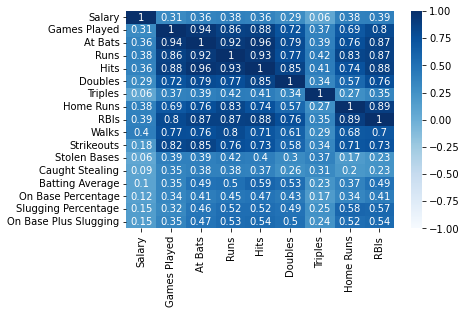

<Figure size 1800x720 with 0 Axes>

In [136]:
corrMatrix = round(overallData.corr(), 2)
corrMatrix = corrMatrix[corrMatrix.columns[0:9]]

#This correlation matrix will show the dependency of variables within different categories
#The close the value to one, the more related the variables are to one another
sns.heatmap(corrMatrix, annot = True, vmin = -1, vmax = 1, cmap ='Blues')
plt.figure(figsize = (25,10))
plt.show()

### As we can see from this graph, there is a large correlation between a player's salary and their hitting statistics. The largest correlation is between salary and RBIs. Now, we will examine specifically their relationship, specifically in the form of a Linear Regression model

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
X = overallData['RBIs'].values.reshape(-1,1)
y = overallData['Salary'].values

x_train, x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

clf.score(x_test, y_test)

0.22031276166456049

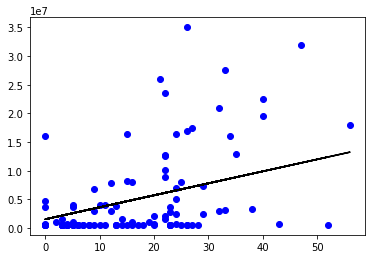

In [249]:
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')

In [262]:
rbiRang = np.arange(1,10)

for rbis in rbiRang:
    print(f"Player hitting {rbis} RBI(s) predicted salary is {clf.predict([[rbis]])[0]}")

Player hitting 1 RBI(s) predicted salary is 1768441.4095035072
Player hitting 2 RBI(s) predicted salary is 1977107.032145978
Player hitting 3 RBI(s) predicted salary is 2185772.654788449
Player hitting 4 RBI(s) predicted salary is 2394438.2774309195
Player hitting 5 RBI(s) predicted salary is 2603103.9000733905
Player hitting 6 RBI(s) predicted salary is 2811769.522715861
Player hitting 7 RBI(s) predicted salary is 3020435.145358332
Player hitting 8 RBI(s) predicted salary is 3229100.768000803
Player hitting 9 RBI(s) predicted salary is 3437766.3906432735


### Even though the model is not very accurate, we can see a trend in the data. As the number of RBIs hit by a player increases 

# Machine Learning + Model Comparisons

In [56]:
!pip install statsmodels
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [29]:
filepath = 'Datasets/Teams.csv'
df_teams = pd.read_csv(filepath, header = 0)#.drop(['MOV','Run Line +/-'], axis=1)

'''
Extract predictor variables:

Main variable

attendance - Home attendance total

Other variables

divID - Team's division
SB - Stolen bases
SF - Sacrifice flies
'''

df_teams_red = df_teams[['yearID', 'teamID', 'attendance', 'divID', 'SB', 'SF', 'W', 'HR']].copy()

# Make unique primary key consisting of yearID and teamID (a team can be active across multiple years)

df_teams_red.set_index(['yearID','teamID'], inplace=True)
#df_teams_red
#df_teams_red.head(15)
#df_teams_red.loc[1871]

In [32]:
'''
Generate outcome variable:

win_percentages - Probability that a team wins a game
win_percentages = W/(W+L)
'''

df_calc_out = df_teams[['yearID', 'teamID', 'W', 'L']].copy()
win_percentages = list(round(df_calc_out['W'].copy() / (df_calc_out['W'].copy() + df_calc_out['L'].copy()), 5))
df_teams_red['win_percentages'] = win_percentages
df_teams_red

attendance divID     SB    SF    W   HR  win_percentages
yearID teamID                                                          
1871   BS1            NaN   NaN   73.0   NaN   20    3          0.66667
       CH1            NaN   NaN   69.0   NaN   19   10          0.67857
       CL1            NaN   NaN   18.0   NaN   10    7          0.34483
       FW1            NaN   NaN   16.0   NaN    7    2          0.36842
       NY2            NaN   NaN   46.0   NaN   16    1          0.48485
...                   ...   ...    ...   ...  ...  ...              ...
2021   SLN      2102530.0     C   89.0  44.0   90  198          0.55556
       TBA       761072.0     E   88.0  41.0  100  222          0.61728
       TEX      2110258.0     W  106.0  31.0   60  167          0.37037
       TOR       805901.0     E   81.0  35.0   91  262          0.56173
       WAS      1465543.0     E   56.0  31.0   65  182          0.40123

[2985 rows x 7 columns]

In [39]:
# Remove rows containing NA values

df_teams_no_NA = df_teams_red.dropna().copy()
df_teams_no_NA

attendance divID     SB    SF    W   HR  win_percentages
yearID teamID                                                          
1970   ATL      1078848.0     W   58.0  42.0   76  160          0.46914
       BAL      1057069.0     E   84.0  46.0  108  179          0.66667
       BOS      1595278.0     E   50.0  47.0   87  203          0.53704
       CAL      1077741.0     W   69.0  37.0   86  114          0.53086
       CHA       495355.0     W   53.0  48.0   56  123          0.34568
...                   ...   ...    ...   ...  ...  ...              ...
2021   SLN      2102530.0     C   89.0  44.0   90  198          0.55556
       TBA       761072.0     E   88.0  41.0  100  222          0.61728
       TEX      2110258.0     W  106.0  31.0   60  167          0.37037
       TOR       805901.0     E   81.0  35.0   91  262          0.56173
       WAS      1465543.0     E   56.0  31.0   65  182          0.40123

[1444 rows x 7 columns]

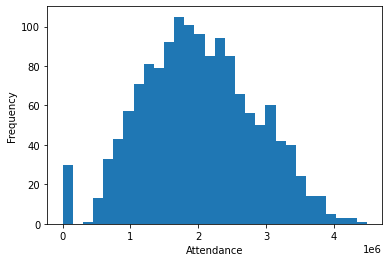

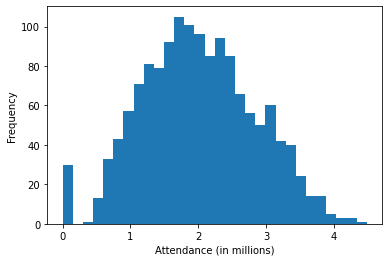

              divID     SB    SF    W   HR  win_percentages  attendance
yearID teamID                                                          
1970   ATL        W   58.0  42.0   76  160          0.46914     1.07885
       BAL        E   84.0  46.0  108  179          0.66667     1.05707
       BOS        E   50.0  47.0   87  203          0.53704     1.59528
       CAL        W   69.0  37.0   86  114          0.53086     1.07774
       CHA        W   53.0  48.0   56  123          0.34568     0.49536
...             ...    ...   ...  ...  ...              ...         ...
2021   SLN        C   89.0  44.0   90  198          0.55556     2.10253
       TBA        E   88.0  41.0  100  222          0.61728     0.76107
       TEX        W  106.0  31.0   60  167          0.37037     2.11026
       TOR        E   81.0  35.0   91  262          0.56173     0.80590
       WAS        E   56.0  31.0   65  182          0.40123     1.46554

[1444 rows x 7 columns]


In [40]:
# Checking distributions of predictors

attendance = np.array(df_teams_no_NA.loc[:,['attendance']])
plt.hist(attendance, bins=30)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

# Scale down to the millions

scale = 1e6
attendance_scaled = np.round(attendance / scale, 5)
plt.hist(attendance_scaled, bins=30)
plt.xlabel('Attendance (in millions)')
plt.ylabel('Frequency')
plt.show()

# replace original column

df_teams_no_NA.drop(['attendance'], axis=1, inplace=True)
df_teams_no_NA['attendance'] = attendance_scaled
print(df_teams_no_NA)

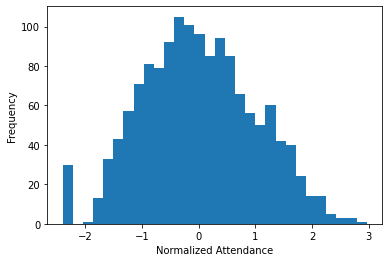

In [42]:
# Let's now standardize this data, as the scale of attendance might have a bias towards the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_attendance = scaler.fit_transform(attendance.reshape(-1,1))

plt.hist(scaled_attendance, bins=30)
plt.xlabel('Normalized Attendance')
plt.ylabel('Frequency')
plt.show()

In [44]:
df_teams_no_NA

divID     SB    SF    W   HR  win_percentages  attendance
yearID teamID                                                          
1970   ATL        W   58.0  42.0   76  160          0.46914     1.07885
       BAL        E   84.0  46.0  108  179          0.66667     1.05707
       BOS        E   50.0  47.0   87  203          0.53704     1.59528
       CAL        W   69.0  37.0   86  114          0.53086     1.07774
       CHA        W   53.0  48.0   56  123          0.34568     0.49536
...             ...    ...   ...  ...  ...              ...         ...
2021   SLN        C   89.0  44.0   90  198          0.55556     2.10253
       TBA        E   88.0  41.0  100  222          0.61728     0.76107
       TEX        W  106.0  31.0   60  167          0.37037     2.11026
       TOR        E   81.0  35.0   91  262          0.56173     0.80590
       WAS        E   56.0  31.0   65  182          0.40123     1.46554

[1444 rows x 7 columns]

In [46]:
model = ols('attendance ~ win_percentages + HR',
            data=df_teams_no_NA)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     307.3
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          7.08e-112
Time:                        18:57:14   Log-Likelihood:                -1533.0
No. Observations:                1444   AIC:                             3072.
Df Residuals:                    1441   BIC:                             3088.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7019      0.133     -5.269      0.000      -0.963      -0.441
win_percentages     3.1014      0.270     11.481      0.000       2.572       3.631
HR                  0.0077      0.000     17.709      0.000       0.007       0.009
==============================================================================
Omnibus:                        8.297   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.347
Skew:                           0.162   Prob(JB):                       0.0154
Kurtosis:                       3.184   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
print(df_teams_no_NA[df_teams_no_NA['divID'] == 'W'].shape)
print(df_teams_no_NA[df_teams_no_NA['divID'] == 'C'].shape)
print(df_teams_no_NA[df_teams_no_NA['divID'] == 'E'].shape)

(563, 7)
(295, 7)
(586, 7)


In [50]:
# retain relevant features for the model

df_teams_red = df_teams.drop(['yearID', 'lgID', 'teamID', 'franchID',
                              'Rank', 'DivWin', 'WCWin', 'name', 'park', 'BPF',
                              'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'], axis = 1).copy()
# check for multicollinearity (example: Wins, Losses, G, GHome...)

df_teams_red

,divID,G,Ghome,W,L,LgWin,WSWin,R,AB,H,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance
0,NaN,31,NaN,20,10,N,NaN,401,1372,426,...,3,828,367,2,42,23,243,24,0.834,NaN
1,NaN,28,NaN,19,9,N,NaN,302,1196,323,...,1,753,308,6,28,22,229,16,0.829,NaN
2,NaN,29,NaN,10,19,N,NaN,249,1186,328,...,0,762,346,13,53,34,234,15,0.818,NaN
3,NaN,19,NaN,7,12,N,NaN,137,746,178,...,0,507,261,5,21,17,163,8,0.803,NaN
4,NaN,33,NaN,16,17,N,NaN,302,1404,403,...,0,879,373,7,42,22,235,14,0.840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,C,162,81.0,90,72,N,N,706,5351,1303,...,50,4251,1234,152,608,1225,84,137,0.986,2102530.0
2981,E,162,81.0,100,62,N,N,857,5507,1336,...,42,4367,1264,184,436,1478,80,130,0.986,761072.0
2982,W,162,81.0,60,102,N,N,625,5405,1254,...,31,4273,1402,232,513,1239,83,146,0.986,2110258.0
2983,E,162,80.0,91,71,N,N,846,5476,1455,...,34,4216,1257,209,473,1468,90,122,0.984,805901.0


In [114]:
# Remove data where the division ID does not exist
df_teams_no_NA = df_teams_red[df_teams_red['divID'].isna() == False].copy()
df_teams_no_NA

,divID,G,Ghome,W,L,LgWin,WSWin,R,AB,H,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance
1517,W,162,81.0,93,69,N,N,691,5460,1411,...,42,4335,1334,144,438,893,115,114,0.981,1458320.0
1518,E,162,81.0,109,53,Y,N,779,5518,1465,...,36,4419,1194,117,498,897,101,145,0.984,1062069.0
1519,E,162,81.0,87,75,N,N,743,5494,1381,...,41,4398,1423,155,685,935,157,178,0.975,1833246.0
1520,W,163,81.0,71,91,N,N,528,5316,1221,...,39,4314,1294,126,517,885,135,164,0.978,758388.0
1521,W,162,81.0,68,94,N,N,625,5450,1346,...,25,4311,1470,146,564,810,122,163,0.981,589546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,C,162,81.0,90,72,N,N,706,5351,1303,...,50,4251,1234,152,608,1225,84,137,0.986,2102530.0
2981,E,162,81.0,100,62,N,N,857,5507,1336,...,42,4367,1264,184,436,1478,80,130,0.986,761072.0
2982,W,162,81.0,60,102,N,N,625,5405,1254,...,31,4273,1402,232,513,1239,83,146,0.986,2110258.0
2983,E,162,80.0,91,71,N,N,846,5476,1455,...,34,4216,1257,209,473,1468,90,122,0.984,805901.0


In [115]:
# Unique values of categorical target variable
print(set(df_teams_no_NA['divID']))

df_teams_no_NA =  df_teams_no_NA.dropna().copy()

#Must convert the N and Y values to binary 1 and 0 values
df_teams_no_NA['LgWin'] = df_teams_no_NA['LgWin'].str.replace('N','0')
df_teams_no_NA['LgWin'] = df_teams_no_NA['LgWin'].str.replace('Y','1')
df_teams_no_NA['WSWin'] = df_teams_no_NA['WSWin'].str.replace('N','0')
df_teams_no_NA['WSWin'] = df_teams_no_NA['WSWin'].str.replace('Y','1')

df_teams_no_NA[['LgWin','WSWin']] = df_teams_no_NA[['LgWin','WSWin']].astype(int)
df_teams_no_NA.isna().sum()
df_teams_no_NA.dtypes

{'E', 'W', 'C'}


divID          object
G               int64
Ghome         float64
W               int64
L               int64
LgWin           int32
WSWin           int32
R               int64
AB              int64
H               int64
2B              int64
3B              int64
HR              int64
BB            float64
SO            float64
SB            float64
CS            float64
HBP           float64
SF            float64
RA              int64
ER              int64
ERA           float64
CG              int64
SHO             int64
SV              int64
IPouts          int64
HA              int64
HRA             int64
BBA             int64
SOA             int64
E               int64
DP              int64
FP            float64
attendance    float64
dtype: object

In [116]:
# Train Test Split
X = df_teams_no_NA.drop('divID', axis=1).copy()
y = df_teams_no_NA['divID'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [119]:
# Normalize training data

X_train_scaled = pd.DataFrame()

# save means and standard deviations when given a testing example

column_names = []
X_train_means = []
X_train_standard_deviations = []

for col in X_train.columns:
    column_names.append(col)
    X_train_scaled[col] = (X_train[col] - np.mean(X_train[col])) / np.std(X_train[col])
    X_train_means.append(np.mean(X_train[col]))
    X_train_standard_deviations.append(np.std(X_train[col]))
X_train_scaled

,G,Ghome,W,L,LgWin,WSWin,R,AB,H,2B,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance
2336,0.164875,0.224460,0.000824,0.200343,-0.275764,-0.188896,0.224720,0.191448,0.240215,0.309757,...,1.077837,0.101771,0.432498,0.476599,1.551297,0.205632,0.403127,-0.080256,-0.291484,-0.935023
2027,0.224810,0.224460,-0.286146,0.557828,-0.275764,-0.188896,-0.637920,0.210193,-0.206962,-0.349870,...,-0.075189,0.329856,0.025062,-0.650315,0.471596,-0.107467,0.256347,-1.548874,-0.291484,-0.027546
1589,-0.194737,-0.132239,-0.644858,0.343337,-0.275764,-0.188896,-0.672774,-0.202187,-0.201302,-1.562735,...,-1.123395,-0.244743,0.069712,0.118035,-0.086052,-1.221203,1.540675,-0.651386,-1.902351,-1.489951
1696,0.224810,0.224460,0.933476,-0.657621,-0.275764,-0.188896,-0.847044,0.128398,-0.156018,-1.264838,...,-1.018575,0.371526,-0.387956,-1.367442,-0.477591,-1.154111,0.513213,0.327693,-0.291484,0.457774
2125,0.224810,0.224460,1.794385,-1.515584,-0.275764,-0.188896,0.538407,0.201673,0.257196,-0.434984,...,0.868196,0.268449,-0.572140,-1.264995,-0.465727,0.138539,-0.220689,0.001333,0.513950,2.244622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,0.224810,0.224460,1.148703,-0.872111,-0.275764,-0.188896,0.712677,0.283467,0.800601,0.799159,...,1.497119,0.169758,0.036224,-0.035635,-0.323348,0.491894,-0.404165,0.082923,0.513950,0.762746
2699,0.224810,0.224460,-0.716601,0.986810,-0.275764,-0.188896,-0.838331,0.068757,-0.405078,0.033139,...,0.029631,0.174144,0.270640,-0.445422,-0.287754,0.482948,-0.404165,0.327693,0.513950,0.258799
2863,0.224810,0.224460,-0.214403,0.486331,-0.275764,-0.188896,-0.106394,0.174408,-0.444702,0.203366,...,0.763375,0.334243,0.337616,1.347396,0.352948,1.641413,-0.807811,-0.039462,1.050906,1.432735
2429,0.224810,0.224460,0.431279,-0.157142,-0.275764,-0.188896,-1.143304,0.104542,-0.399418,0.011861,...,2.126043,0.285994,-0.812137,-0.599092,0.080056,1.270167,0.182957,0.735642,-0.023006,1.354913


In [123]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train_scaled, y_train)
  
# Calculate the accuracy of the model

# Normalize testing data

X_test_scaled = pd.DataFrame()

column_names = []
X_test_means = []
X_test_standard_deviations = []

for col in X_test.columns:
    column_names.append(col)
    X_test_scaled[col] = (X_test[col] - np.mean(X_test[col])) / np.std(X_test[col])
    X_test_means.append(np.mean(X_test[col]))
    X_test_standard_deviations.append(np.std(X_test[col]))

# Model Score

print(knn.score(X_test_scaled, y_test))

0.5422535211267606


In [124]:
# Predicting the division ID given an input of features

# testing with NaN value - have not done this yet

df_temp = X_test_scaled.iloc[0].to_frame().T
print(df_temp)
print(knn.predict(df_temp))

             G     Ghome         W         L     LgWin     WSWin         R  \
2381  0.239638  0.374432  0.957311 -0.710029 -0.289775 -0.210042  0.930656   

            AB        H        2B  ...        SV   IPouts        HA       HRA  \
2381  0.091656  0.40766  0.337078  ...  0.051247  0.14693 -0.059163  1.203313   

           BBA      SOA         E        DP        FP  attendance  
2381  0.135655  0.34436 -0.113948  0.439513  0.212403    1.266041  

[1 rows x 33 columns]
['W']


## Compare home team vs away team winning % (use 2-sample proportion test)

In [62]:
df_away = pd.read_csv('Datasets/MLB_Away_Team_Wins_Since_2007.csv', header = 0).drop(['MOV','Run Line +/-'], axis=1)
df_home = pd.read_csv('Datasets/MLB_Home_Team_Wins_Since_2007.csv', header = 0).drop(['MOV','Run Line +/-'], axis=1)

df_merged = df_away.merge(df_home, on='Team')
df_merged = df_merged.rename({'Win %_x':'Win_Perc_Away', 'Win %_y':'Win_Perc_Home'}, axis=1)
df_merged['Win_Perc_Away'] = [float(x[0:5]) / 100 for x in df_merged['Win_Perc_Away']] # convert to floats
df_merged['Win_Perc_Home'] = [float(x[0:5]) / 100 for x in df_merged['Win_Perc_Home']] # convert to floats
df_merged['Total_Games_Away'] = [sum(list(map(int, y))) for y in [x.split('-') for x in df_merged['Win-Loss Record_x']]] # total games
df_merged['Total_Games_Home'] = [sum(list(map(int, y))) for y in [x.split('-') for x in df_merged['Win-Loss Record_y']]] # total games
df_merged['Games_Won_Away'] = [x.split('-')[0] for x in df_merged['Win-Loss Record_x']]
df_merged['Games_Won_Home'] = [x.split('-')[0] for x in df_merged['Win-Loss Record_y']]
df_merged.drop(['Win-Loss Record_x', 'Win-Loss Record_y'], axis=1, inplace = True)

df_merged

,Team,Win_Perc_Away,Win_Perc_Home,Total_Games_Away,Total_Games_Home,Games_Won_Away,Games_Won_Home
0,Arizona,0.437,0.516,1253,1251,547,645
1,Atlanta,0.491,0.560,1262,1265,620,708
2,Baltimore,0.405,0.492,1255,1245,508,613
3,Boston,0.517,0.574,1279,1279,661,734
4,Chi Cubs,0.466,0.542,1256,1268,585,687
5,Chi Sox,0.443,0.513,1252,1245,554,639
6,Cincinnati,0.431,0.512,1251,1245,539,637
7,Cleveland,0.490,0.557,1262,1264,618,704
8,Colorado,0.403,0.542,1256,1250,506,677
9,Detroit,0.438,0.525,1262,1258,553,660
